In [4]:

import numpy as np
import matplotlib.pyplot as plt

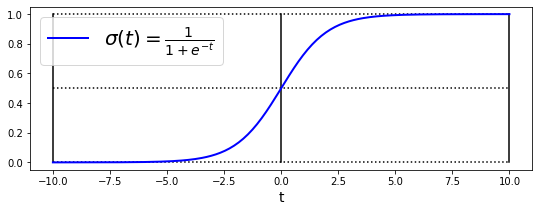

In [37]:

#Logistic Function
t = np.linspace(-10, 10, 200)
sigma = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10], [0,0], "k:")
plt.plot([-10,10], [0.5,0.5], "k:")
plt.plot([-10,10], [1,1], "k:")

plt.plot([0,0], [0,1], "k-")
plt.plot([-10,-10], [0,1], "k-")
plt.plot([10,10], [0,1], "k-")
plt.xlabel("t", fontsize=14)

plt.plot(t, sigma, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1+e^{-t}}$")
plt.legend(loc="upper left", fontsize=20)